In [1]:
pwd

'C:\\WINDOWS\\system32'

In [3]:
import pandas as pd

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [5]:
df = pd.read_csv("Bike1.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,01-02-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,01-03-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,01-04-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,01-05-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.set_index('instant', inplace=True)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,01-02-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,01-03-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,01-04-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,01-05-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
df["date"] = pd.DatetimeIndex(df["dteday"]).day
df["month"] = pd.DatetimeIndex(df["dteday"]).month_name()
df["year"] = pd.DatetimeIndex(df["dteday"]).year

# dropping the redundant columns
df.drop(["dteday","mnth"], axis=1, inplace=True)

# checking the new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  casual      730 non-null    int64  
 11  registered  730 non-null    int64  
 12  cnt         730 non-null    int64  
 13  date        730 non-null    int64  
 14  month       730 non-null    object 
 15  year        730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 97.0+ KB


In [9]:
df.groupby("weekday").sum()["workingday"]

weekday
0      0
1    105
2    100
3     93
4    103
5    103
6      0
Name: workingday, dtype: int64

In [10]:
name_dict = {"season" : {1:"spring", 2:"summer", 3:"fall", 4:"winter"}, 
             "weathersit" : {1: "Clear/Partly Cloudy", 2: "Mist and Cloudy", 3: "Light Snow/Rain", 4: "Heavy Snow/Rain"},
             "weekday" : {0: "Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"}}

for column in name_dict.keys():
    df[column] = df[column].apply(lambda x : name_dict[column][x])

df.head()

,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date,month,year
instant,,,,,,,,,,,,,,,,
1,spring,0,0,Monday,1,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,1,January,2018
2,spring,0,0,Tuesday,1,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,2,January,2018
3,spring,0,0,Wednesday,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3,January,2018
4,spring,0,0,Thursday,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4,January,2018
5,spring,0,0,Friday,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5,January,2018


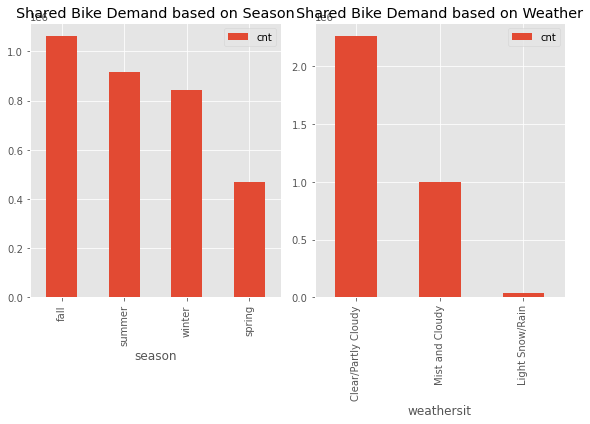

In [11]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 3, 1, title="Shared Bike Demand based on Season")
ax2 = fig.add_subplot(1, 3, 2, title="Shared Bike Demand based on Weather")

df.groupby('season').sum().sort_values('cnt', ascending=False)[['cnt']].plot.bar(ax=ax1)
df.groupby('weathersit').sum().sort_values('cnt', ascending=False)[['cnt']].plot.bar(ax=ax2)

plt.tight_layout()
plt.show()

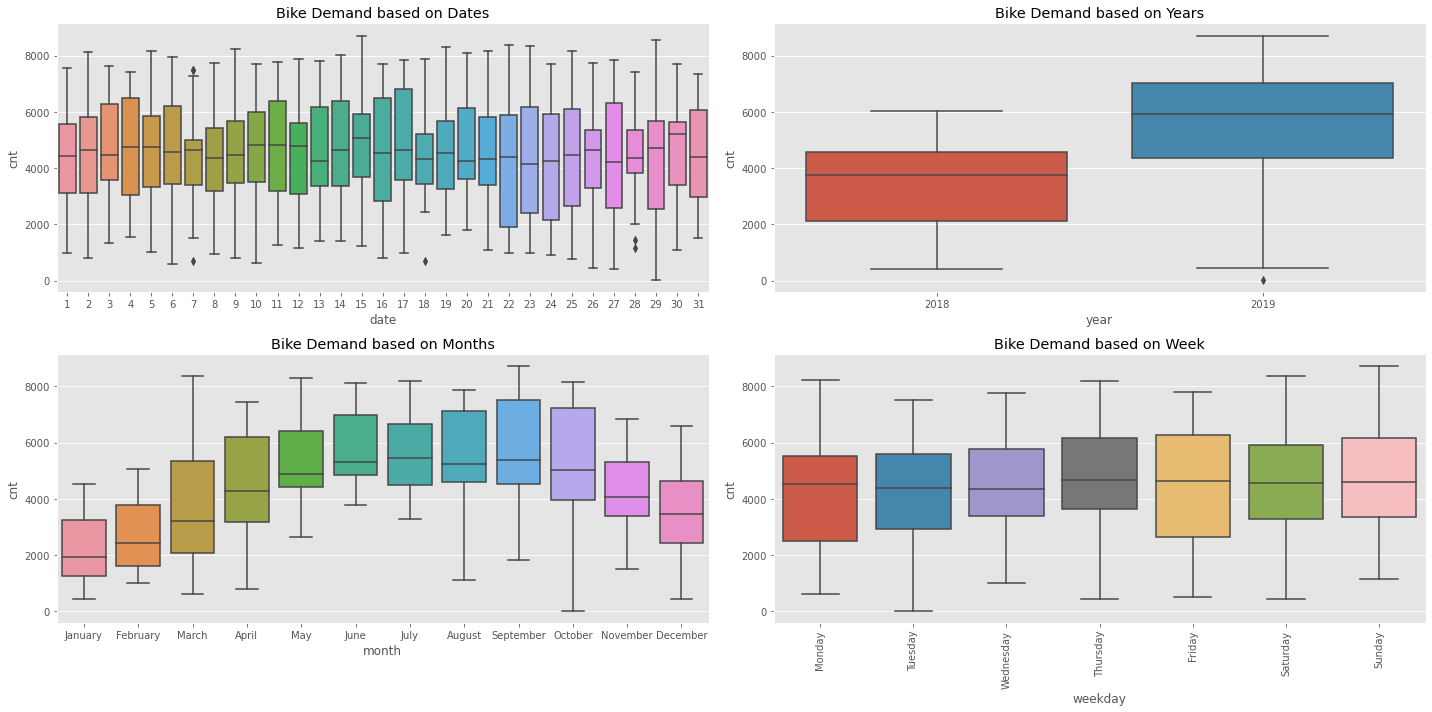

In [12]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(2, 2, 1, title="Bike Demand based on Dates")
ax2 = fig.add_subplot(2, 2, 2, title="Bike Demand based on Years")
ax3 = fig.add_subplot(2, 2, 3, title="Bike Demand based on Months")
ax4 = fig.add_subplot(2, 2, 4, title="Bike Demand based on Week")

sns.boxplot(df['date'], df['cnt'], ax=ax1)
sns.boxplot(df['year'], df['cnt'], ax=ax2)
sns.boxplot(df['month'], df['cnt'], ax=ax3)
sns.boxplot(df['weekday'], df['cnt'], ax=ax4)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

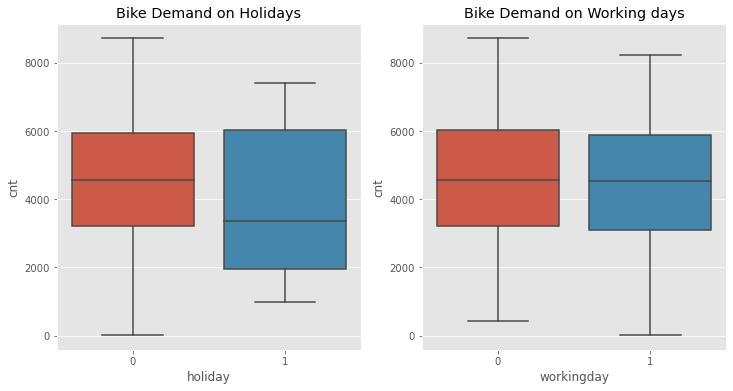

In [13]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Bike Demand on Holidays")
ax2 = fig.add_subplot(1, 2, 2, title="Bike Demand on Working days")

sns.boxplot(df['holiday'], df['cnt'], ax=ax1)
sns.boxplot(df['workingday'], df['cnt'], ax=ax2)

plt.show()

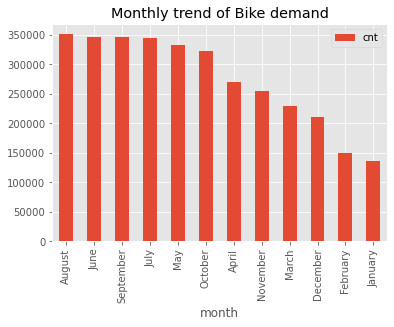

In [14]:
df.groupby('month').sum().sort_values('cnt', ascending=False)[['cnt']].plot.bar()
plt.title("Monthly trend of Bike demand")
plt.show()

In [15]:
df["jul_aug_sep"] = df["month"].apply(lambda month : 1 if month in ["July","August","September"] else 0)
df["may_jun_oct"] = df["month"].apply(lambda month : 1 if month in ["May","June","October"] else 0)
df["mar_apr_nov"] = df["month"].apply(lambda month : 1 if month in ["March","April","November"] else 0)

In [16]:
# dropping 'month', 'year' columns as it is redundant now
df.drop(['month'], axis=1, inplace=True)
df.drop(['year'], axis=1, inplace=True)

In [17]:
def add_dummies(df, feature):
    dummy_df = pd.get_dummies(df[feature], drop_first='True')
    df.drop(feature, axis=1, inplace=True)
    print(df.columns)
    return pd.concat([df,dummy_df], axis=1)

df = add_dummies(df,'season')
df = add_dummies(df,'weekday')
df = add_dummies(df,'weathersit')

Index(['yr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'date',
       'jul_aug_sep', 'may_jun_oct', 'mar_apr_nov'],
      dtype='object')
Index(['yr', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'date', 'jul_aug_sep',
       'may_jun_oct', 'mar_apr_nov', 'spring', 'summer', 'winter'],
      dtype='object')
Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'date', 'jul_aug_sep', 'may_jun_oct',
       'mar_apr_nov', 'spring', 'summer', 'winter', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')


In [18]:
df_num_var = df[["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]]

<Figure size 432x288 with 0 Axes>

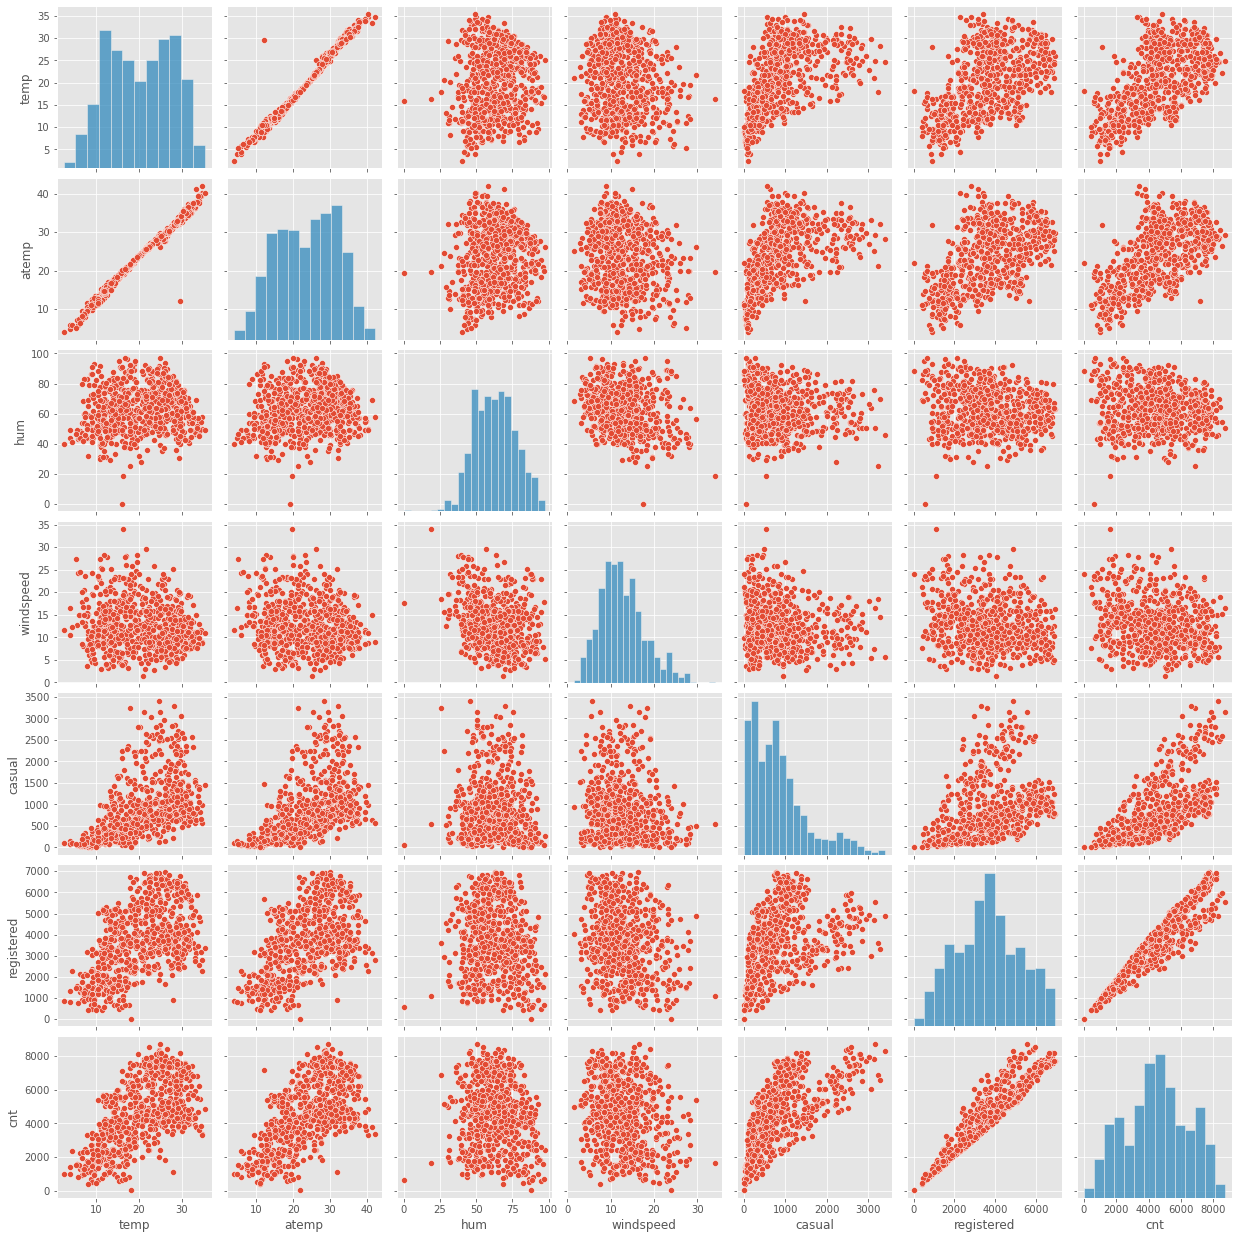

In [19]:
plt.figure()
sns.pairplot(df_num_var)
plt.show()

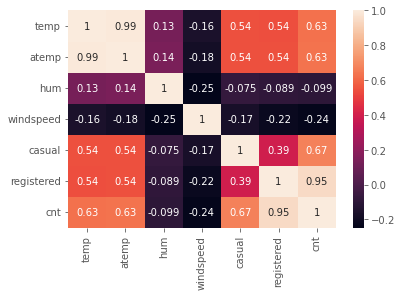

In [20]:
plt.figure()
sns.heatmap(df_num_var.corr(), annot=True)
plt.show()

In [21]:
df[~(df['casual'] + df['registered'] == df['cnt'])]

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow/Rain,Mist and Cloudy
instant,,,,,,,,,,,,,,,,,,,,,


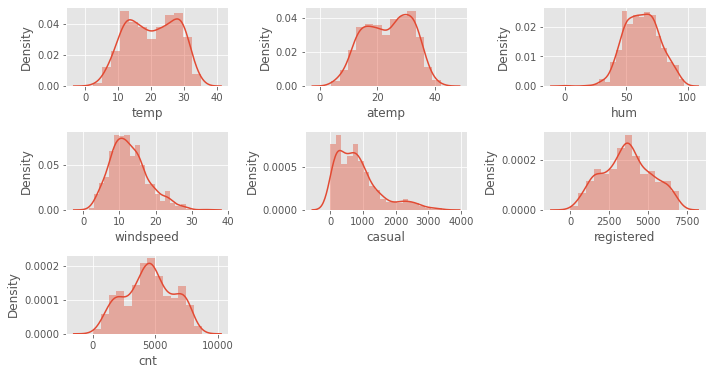

In [22]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.distplot(df[j])
    plt.tight_layout()

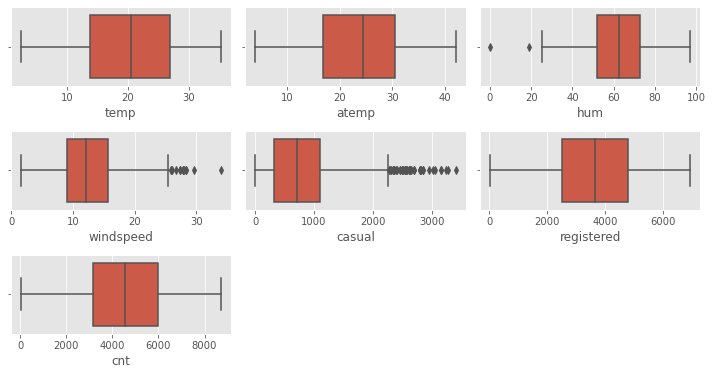

In [23]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(df[j])
    plt.tight_layout()

In [24]:
df = df[~((df.windspeed > np.nanpercentile(df.windspeed, 99)) | (df.casual > np.nanpercentile(df['casual'], 99)))]
print(df.shape)

(714, 25)


In [25]:
# Since cnt = casual + register, casual and register cannot be counted as predictors to prevent data leakage
X = df.drop(['cnt', 'casual', 'registered'], axis=1)
y = df[['cnt']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed']
X[num_vars].describe()

,temp,atemp,hum,windspeed
count,714.000000,714.000000,714.000000,714.000000
mean,20.331718,23.744378,63.058290,12.589957
std,7.531352,8.165370,14.075154,4.930469
min,2.424346,3.953480,0.000000,1.500244
25%,13.777701,16.869600,52.458300,9.011098
50%,20.465826,24.368225,63.000000,12.041441
75%,26.914798,30.547987,73.218750,15.495073
max,35.328347,42.044800,97.250000,27.292182


In [27]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def calculate_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by = 'Variance Inflation Factor', ascending = False)
    print(vif_df)

In [29]:
# Regressor 1 : This is the model including all features

X_train_lm = sm.add_constant(X_train)
regressor1 = sm.OLS(y_train, X_train_lm).fit()
print(regressor1.summary())
print("=======================================================================================================")


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     109.7
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          1.37e-170
Time:                        14:01:41   Log-Likelihood:                -4028.0
No. Observations:                 499   AIC:                             8102.
Df Residuals:                     476   BIC:                             8199.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3481.3054    677.227     

In [34]:
top_14 = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter', 'Monday', 'Saturday', 'Tuesday', 'Light Snow/Rain', 'Mist and Cloudy']

build_regressor(X_train,y_train,top_14)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     161.4
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          4.18e-172
Time:                        14:04:04   Log-Likelihood:                -4045.0
No. Observations:                 499   AIC:                             8120.
Df Residuals:                     484   BIC:                             8183.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2819.2125    377.641     

In [35]:
top_13 = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter', 'Monday',  'Light Snow/Rain','Tuesday', 'Mist and Cloudy']

build_regressor(X_train,y_train,top_13)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     174.2
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          3.12e-173
Time:                        14:04:19   Log-Likelihood:                -4045.1
No. Observations:                 499   AIC:                             8118.
Df Residuals:                     485   BIC:                             8177.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2826.3401    367.392     

In [36]:
top_12 = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter', 'Monday',  'Light Snow/Rain','Tuesday', 'Mist and Cloudy']

build_regressor(X_train,y_train,top_12)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     189.1
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          2.23e-174
Time:                        14:04:35   Log-Likelihood:                -4045.1
No. Observations:                 499   AIC:                             8116.
Df Residuals:                     486   BIC:                             8171.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2829.9687    365.355     

In [37]:
top_12 = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter', 'Monday',  'Light Snow/Rain','Tuesday', 'Mist and Cloudy']
X_train_top12 = X_train[top_12]
regressor = LinearRegression()
regressor.fit(X_train_top12, y_train)

LinearRegression()

Text(0.5, 0, 'Errors')

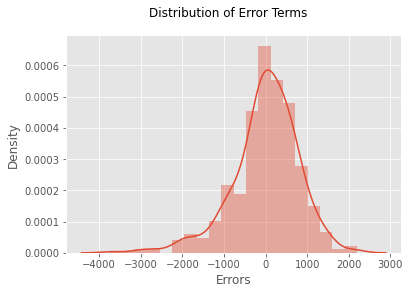

In [38]:
y_train_pred = regressor.predict(X_train_top12)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Distribution of Error Terms')
plt.xlabel('Errors')

In [41]:
X_test_top12 = X_test[top_12]

y_test_pred = regressor.predict(X_test_top12)

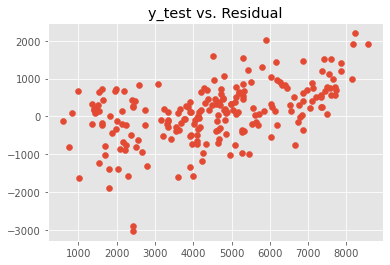

In [42]:
plt.scatter(y_test, (y_test-y_test_pred))
plt.title("y_test vs. Residual")
plt.show()

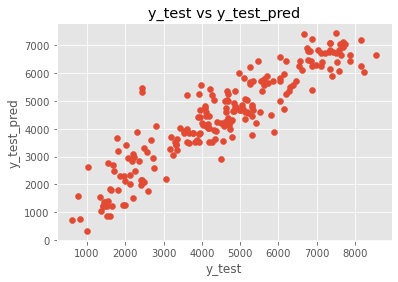

In [43]:
plt.scatter(y_test, y_test_pred)
plt.title('y_test vs y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')      
plt.show()

In [44]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAE: 590.9251471084364
MSE: 609323.0868991826
RMSE: 780.5914980956318


In [45]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_test_pred))

0.8372335856170869


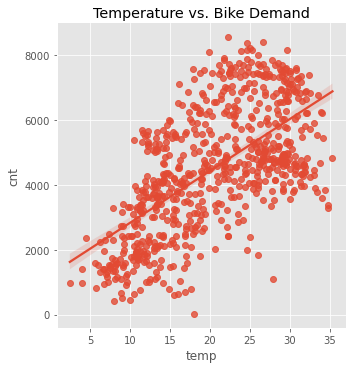

In [46]:
sns.lmplot(x="temp",y="cnt",data=df)
plt.title("Temperature vs. Bike Demand")
plt.show()

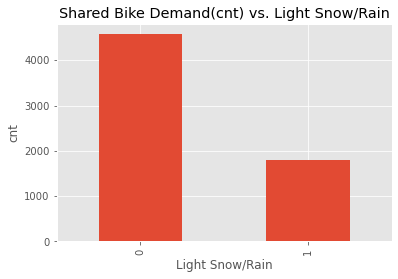

In [47]:
df.groupby("Light Snow/Rain").mean()["cnt"].plot.bar()
plt.ylabel("cnt")
plt.title("Shared Bike Demand(cnt) vs. Light Snow/Rain")
plt.show()

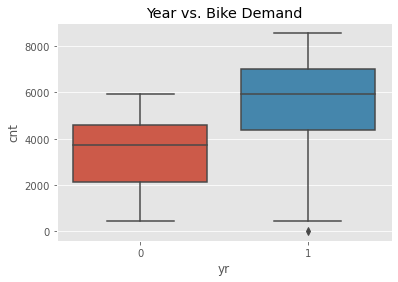

In [48]:
sns.boxplot(df['yr'], df['cnt'])
plt.title("Year vs. Bike Demand")
plt.show()

<AxesSubplot:>

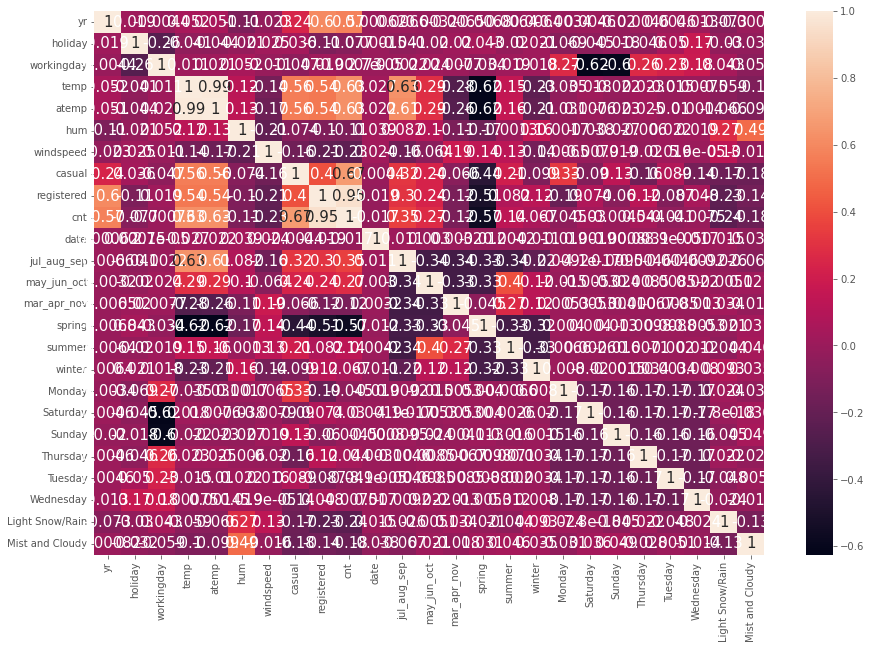

In [52]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})